## ML Coursework

Loading external files and Python packages

In [45]:
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from numpy import mean
from numpy import std

from pandas import read_csv
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from models.ml_models import *
from models.graphics import *

### 1.0 Linear Regression Experiments:

In [47]:
X = 2 * np.random.rand(50,1)
Y = 4 +3 * X+np.random.randn(50,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [48]:
def linear_model(X,Y,title, model,optimizer, opt_attr, sampling = True, iterations = 100, batch_size = 1):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    fig.suptitle(title, fontsize=16)
    ax1.scatter(X,Y, c="tab:gray")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")    
    
    MSE = []
    for t in range(iterations):  
        if sampling:
            xs,ys = sample(X,Y,batch_size)
        else: xs, ys = X, Y
        optimizer(xs,ys, attr=opt_attr)
        MSE.append([t,model.mse(X,Y)])
        progress_plot(ax1,model,X,xs)
        
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="tab:blue")
    ax2.xaxis.grid(True,linestyle=":",color='black')
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Mean Squared Error")
    plt.show()

#### 1.1 Gradient Descent:

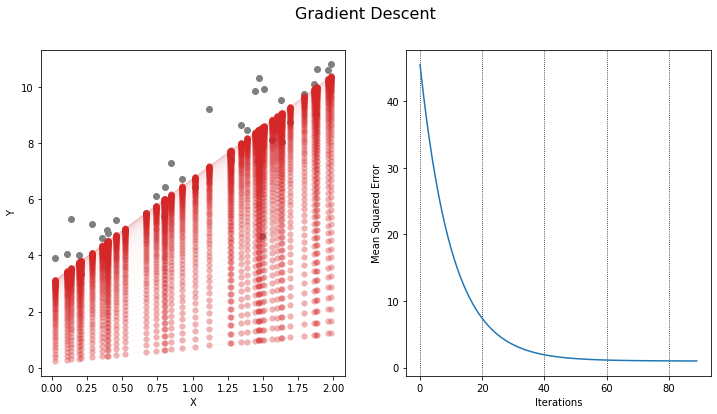

Function:  f(yhat) = 3.05 + 3.7x
Error rate (MSE) on test set: 1.35


In [58]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Gradient Descent",
            model = lm,
            optimizer = lm.gd,
            opt_attr = {"lr":0.01},
            sampling = False,
            iterations = 90,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.1 Stochastic Gradient Descent:

Text text text

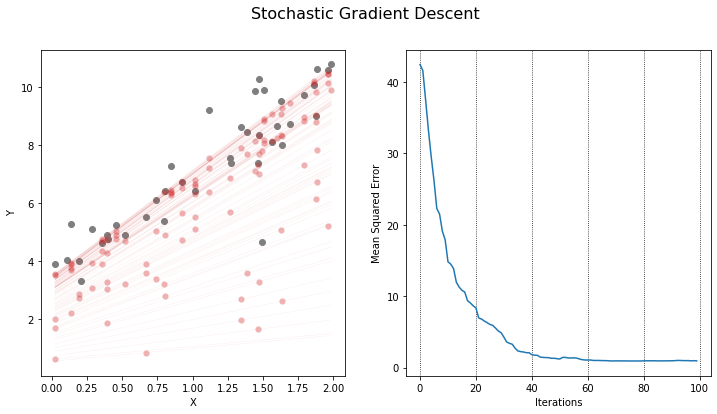

Function:  f(yhat) = 3.44 + 3.59x
Error rate (MSE) on test set: 1.23


In [59]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Stochastic Gradient Descent",
            model = lm,
            optimizer = lm.gd,
            opt_attr = {"lr":0.01},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

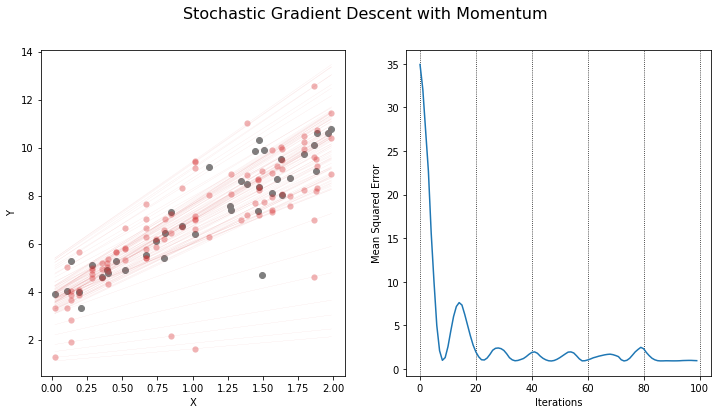

Function:  f(yhat) = 3.64 + 3.46x
Error rate (MSE) on test set: 1.25


In [85]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Stochastic Gradient Descent with Momentum",
            model = lm,
            optimizer = lm.gd_m,
            opt_attr = {"lr":0.01, "decay":0.9},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

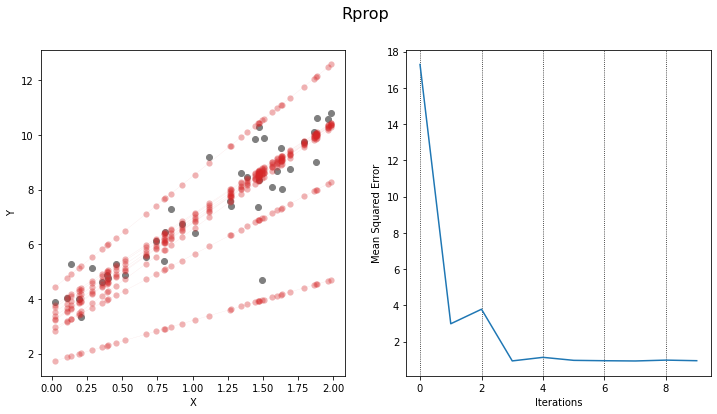

Function:  f(yhat) = 3.29 + 3.57x
Error rate (MSE) on test set: 1.3


In [64]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Rprop",
            model = lm,
            optimizer = lm.rprop,
            opt_attr = {"decay":0.9, "inc":1.2 ,"dec":0.5, "step_sizes":(0.000001,50)},
            sampling = False,
            iterations = 10,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

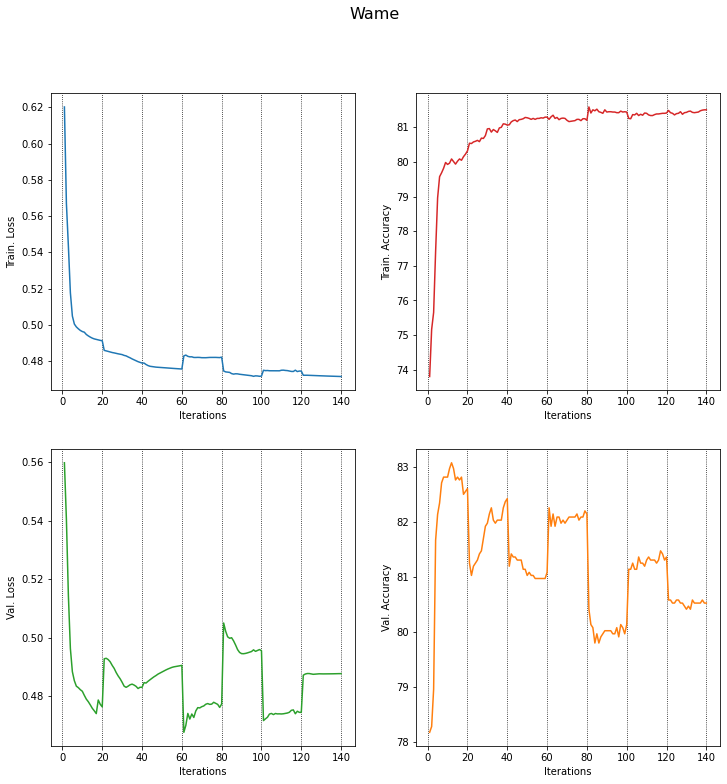

In [18]:
visualise_board(log, "Wame")

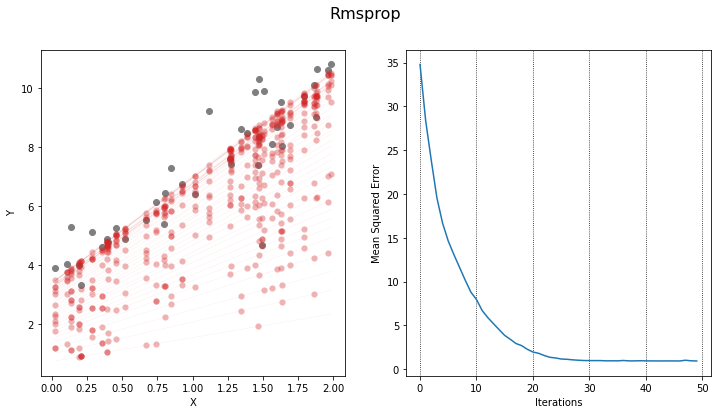

Function:  f(yhat) = 3.34 + 3.48x
Error rate (MSE) on test set: 1.33


In [75]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Rmsprop",
            model = lm,
            optimizer = lm.rmsprop,
            opt_attr = {"lr":0.1, "decay":0.9,  "eps":0.000001},
            sampling = True,
            iterations = 50,
            batch_size = 10,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

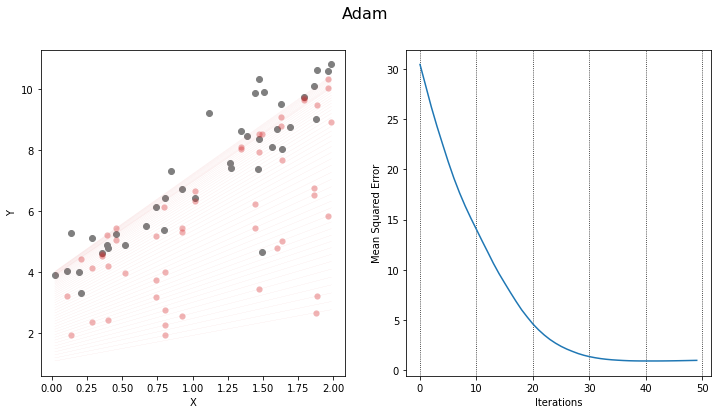

Function:  f(yhat) = 3.96 + 3.26x
Error rate (MSE) on test set: 1.32


In [76]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Adam",
            model = lm,
            optimizer = lm.adam,
            opt_attr = {"lr":0.1, "decay":0.9,  "eps":0.000001, "b":(0.9,0.999), "eps":0.000001},
            sampling = True,
            iterations = 50,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### WAME:

In this notebook we'll create a 3-layer nueral network (i.e. two hidden and one output layer) and train it on the XOR data.

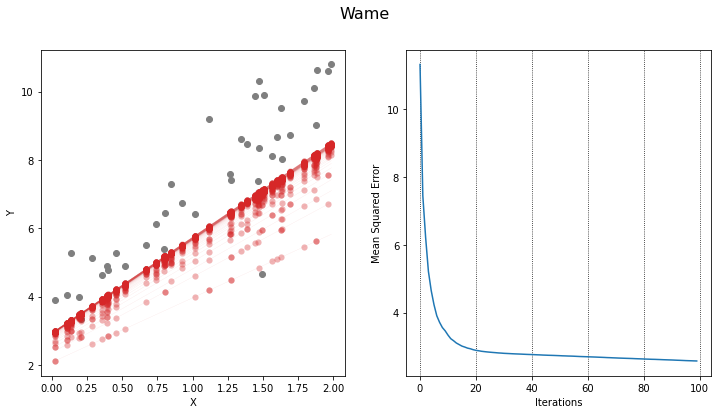

Function:  f(yhat) = 2.94 + 2.8x
Error rate (MSE) on test set: 3.27


In [84]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Wame",
            model = lm,
            optimizer = lm.wame,
            opt_attr = {"lr":0.17, "a":0.9, "inc":1.2 ,"dec":0.1, "step_sizes":(0.001,100)},
            sampling = True,
            iterations = 100,
            batch_size = 20,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

### 2.0 Loading and Preprocessing 'Adult' Dataset:



In [25]:
filename = "adult.csv"
data = read_csv(filename,delimiter=",", na_values="?")

In [26]:
class_counts = data.groupby('income').size()
display(class_counts)

income
<=50K    24720
>50K      7841
dtype: int64

In [27]:
X = data.iloc[:,:14]
y = data.iloc[:,14]

In [13]:
dummy = DummyClassifier(strategy='most_frequent')



accuracy = evl(X, y, dummy)
print('Mean Accuracy: %.2f' % (mean(accuracy),))

Mean Accuracy: 0.76


In [28]:
"""
Undersample
"""  
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X,y)

In [29]:
display(X.isnull().sum())
"""
Imputation
"""
nulls =['workclass','occupation','native.country']
for i in nulls:
    X.fillna(X[i].mode()[0], inplace=True)

age                 0
workclass         726
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        728
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    289
dtype: int64

In [30]:
y = y.replace({'<=50K':0, '>50K':1})

X_fac = copy.deepcopy(X)
X_fac["sex"], u = pd.factorize(X["sex"])
X_fac["race"], u = pd.factorize(X["race"])
X_fac["workclass"], u = pd.factorize(X["workclass"])
X_fac["native.country"], u = pd.factorize(X["native.country"])
X_fac["occupation"], u = pd.factorize(X["occupation"])
X_fac["relationship"], u = pd.factorize(X["relationship"])
X_fac["education"], u = pd.factorize(X["education"])
X['marital.status'] = X['marital.status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
X['marital.status'] = X['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
X_fac['marital.status'] = X['marital.status'].map({'Married':1, 'Single':0})

In [31]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
15677    1
15678    1
15679    1
15680    1
15681    1
Name: income, Length: 15682, dtype: int64


In [17]:
X.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,15682.000000,1.568200e+04,15682.000000,15682.000000,15682.000000,15682.000000
mean,40.526974,1.893269e+05,10.605216,2074.744165,121.610764,42.144624
std,12.964510,1.052783e+05,2.616666,10496.673124,477.747198,12.195964
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.772770e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.354298e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
display(X.skew())

age               0.408039
fnlwgt            1.522518
education.num    -0.318461
capital.gain      8.342602
capital.loss      3.820179
hours.per.week    0.259039
dtype: float64

In [32]:
"""
Scaling
""" 
rescaledX = copy.deepcopy(X_fac)

scaler = MinMaxScaler(feature_range=(0,1))

rescaledX = scaler.fit_transform(X_fac)
#rescaledX[["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]] = scaler.fit_transform(X_fac[["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]])

In [33]:


"""
Splitting
"""

X_train, X_test, y_train, y_test = train_test_split(rescaledX,y.to_numpy(),test_size=0.2, random_state=1)


### 3.0 Neural Network Experiments:

In [35]:
def ml_model(X_train, y_train, model, optimizer, opt_attr, batch_size = 128, epochs = 100, folds = 10):
    
    splits = StratifiedKFold(n_splits = folds, shuffle = True)
    
    log = []
    it = 1
    for fold, (train_idx, valid_idx) in enumerate(splits.split(X_train, y_train)):
        print("\nFold:", fold+1)
                    
        X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
        X_valid_fold, y_valid_fold = X_train[valid_idx], y_train[valid_idx]

        for t in range(epochs):
        
            train_loss, train_acc = [], []
            valid_loss, valid_acc = [], []  

            X_t_batch = sample_batch(X_train_fold, batch_size)
            y_t_batch = sample_batch(y_train_fold, batch_size)

            X_v_batch = sample_batch(X_valid_fold, batch_size)
            y_v_batch = sample_batch(y_valid_fold, batch_size)

            for Xs, ys in zip(X_t_batch, y_t_batch):
                                
                nn.forward(Xs)
                
                _, running_loss = nn.b_cross_entropy(ys, nn.A3)
                train_loss.append(running_loss)
                
                _, _, running_acc = nn.predict(Xs,ys)
                train_acc.append(running_acc)
                
                nn.backward(ys, nn.db_cross_entropy)
                optimizer(attr=opt_attr)

            
            epoch_train_loss = sum(train_loss) / len(train_loss)
            epoch_train_acc = sum(train_acc) / len(train_acc)

            for Xs, ys in zip(X_v_batch, y_v_batch):            
                
                probs, _, running_acc = nn.predict(Xs,ys)
                _, running_loss = nn.b_cross_entropy(ys, probs)
                valid_loss.append(running_loss)
                valid_acc.append(running_acc)
             
            epoch_valid_loss = sum(valid_loss) / len(valid_loss)
            epoch_valid_acc = sum(valid_acc) / len(valid_acc)
            
            if t % 2 == 0:
                print("Epoch: {:02d} - Loss: {:.4f} - Acc: {:.4f} - ".format(t, epoch_train_loss, epoch_train_acc), end="")
                print("Val_Loss: {:.4f} - Val_Acc: {:.4f}".format(epoch_valid_loss, epoch_valid_acc))  
            
            log.append([it, epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc])
            it += 1
    return pd.DataFrame(log, columns=["epochs","T Loss","T Accuracy","V Loss", "V Accuracy"])        

#### 3.1 Gradient Descent:

In this notebook we'll create a 3-layer nueral network (i.e. two hidden and one output layer) and train it on the XOR data.


Fold: 1
Epoch: 00 - Loss: 0.6419 - Acc: 65.3367 - Val_Loss: 0.5719 - Val_Acc: 70.6771
Epoch: 02 - Loss: 0.4757 - Acc: 77.0275 - Val_Loss: 0.4680 - Val_Acc: 78.9062
Epoch: 04 - Loss: 0.4449 - Acc: 78.9062 - Val_Loss: 0.4254 - Val_Acc: 80.0521
Epoch: 06 - Loss: 0.4342 - Acc: 79.6038 - Val_Loss: 0.4107 - Val_Acc: 80.9896
Epoch: 08 - Loss: 0.4292 - Acc: 79.8270 - Val_Loss: 0.4050 - Val_Acc: 81.7188

Fold: 2
Epoch: 00 - Loss: 0.4254 - Acc: 80.0368 - Val_Loss: 0.4369 - Val_Acc: 78.7946
Epoch: 02 - Loss: 0.4227 - Acc: 80.1654 - Val_Loss: 0.4338 - Val_Acc: 78.6830
Epoch: 04 - Loss: 0.4201 - Acc: 80.3952 - Val_Loss: 0.4310 - Val_Acc: 78.8504
Epoch: 06 - Loss: 0.4179 - Acc: 80.6066 - Val_Loss: 0.4287 - Val_Acc: 79.0179
Epoch: 08 - Loss: 0.4161 - Acc: 80.7353 - Val_Loss: 0.4268 - Val_Acc: 79.0179

Fold: 3
Epoch: 00 - Loss: 0.4158 - Acc: 80.5699 - Val_Loss: 0.4523 - Val_Acc: 77.9576
Epoch: 02 - Loss: 0.4144 - Acc: 80.7812 - Val_Loss: 0.4504 - Val_Acc: 77.9576
Epoch: 04 - Loss: 0.4131 - Acc: 80.85

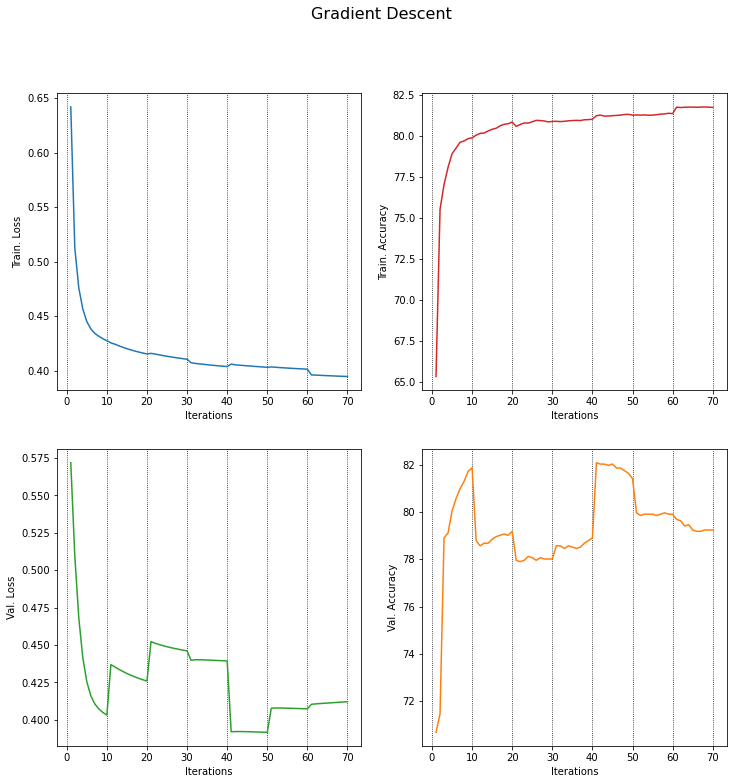

In [36]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.gd, 
                opt_attr = {"lr":0.01},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Gradient Descent")

#### 3.2 Gradient Descent with momentum:


Fold: 1
Epoch: 00 - Loss: 0.5248 - Acc: 73.3910 - Val_Loss: 0.4288 - Val_Acc: 80.6250
Epoch: 02 - Loss: 0.4412 - Acc: 79.1388 - Val_Loss: 0.4043 - Val_Acc: 81.8750
Epoch: 04 - Loss: 0.4278 - Acc: 79.8549 - Val_Loss: 0.3993 - Val_Acc: 81.7188
Epoch: 06 - Loss: 0.4224 - Acc: 79.9014 - Val_Loss: 0.3964 - Val_Acc: 81.8229
Epoch: 08 - Loss: 0.4194 - Acc: 79.9851 - Val_Loss: 0.3941 - Val_Acc: 82.0312

Fold: 2
Epoch: 00 - Loss: 0.4190 - Acc: 80.4320 - Val_Loss: 0.3888 - Val_Acc: 82.0312
Epoch: 02 - Loss: 0.4159 - Acc: 80.4963 - Val_Loss: 0.3887 - Val_Acc: 82.0312
Epoch: 04 - Loss: 0.4141 - Acc: 80.5239 - Val_Loss: 0.3883 - Val_Acc: 81.7522
Epoch: 06 - Loss: 0.4126 - Acc: 80.6801 - Val_Loss: 0.3883 - Val_Acc: 81.5848
Epoch: 08 - Loss: 0.4113 - Acc: 80.6158 - Val_Loss: 0.3884 - Val_Acc: 81.3058

Fold: 3
Epoch: 00 - Loss: 0.4218 - Acc: 80.2941 - Val_Loss: 0.4250 - Val_Acc: 79.9107
Epoch: 02 - Loss: 0.4179 - Acc: 80.5239 - Val_Loss: 0.4353 - Val_Acc: 79.4643
Epoch: 04 - Loss: 0.4168 - Acc: 80.49

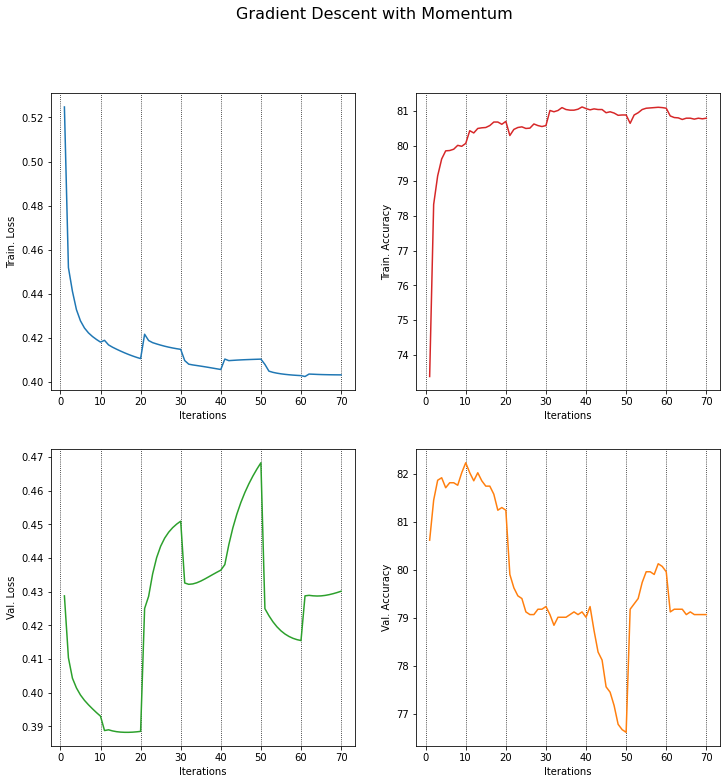

In [37]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.gd_m, 
                opt_attr = {"lr":0.01,"decay":0.9},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Gradient Descent with Momentum")

#### 3.2 Rprop:


Fold: 1
Epoch: 00 - Loss: 0.7586 - Acc: 50.4743 - Val_Loss: 0.6334 - Val_Acc: 74.9442
Epoch: 02 - Loss: 0.5594 - Acc: 58.3612 - Val_Loss: 0.6260 - Val_Acc: 38.3929
Epoch: 04 - Loss: 0.5562 - Acc: 75.7347 - Val_Loss: 0.6257 - Val_Acc: 38.4487
Epoch: 06 - Loss: 0.5551 - Acc: 75.8464 - Val_Loss: 0.6257 - Val_Acc: 38.5603
Epoch: 08 - Loss: 0.5546 - Acc: 75.9487 - Val_Loss: 0.6258 - Val_Acc: 38.5603

Fold: 2
Epoch: 00 - Loss: 0.4821 - Acc: 79.4723 - Val_Loss: 0.5542 - Val_Acc: 77.0089
Epoch: 02 - Loss: 0.4818 - Acc: 79.5679 - Val_Loss: 0.5541 - Val_Acc: 77.0089


/Users/art/Documents/ML/Coursework/NeuralNetwork/models/ml_models.py:217: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


Epoch: 04 - Loss: 0.4815 - Acc: 79.5998 - Val_Loss: 0.5539 - Val_Acc: 77.1763
Epoch: 06 - Loss: 0.4813 - Acc: 79.6795 - Val_Loss: 0.5538 - Val_Acc: 77.1763
Epoch: 08 - Loss: 0.4811 - Acc: 79.7194 - Val_Loss: 0.5536 - Val_Acc: 77.2879

Fold: 3
Epoch: 00 - Loss: 0.5725 - Acc: 80.0702 - Val_Loss: 0.5559 - Val_Acc: 75.0558
Epoch: 02 - Loss: 0.5723 - Acc: 80.1100 - Val_Loss: 0.5557 - Val_Acc: 75.0558
Epoch: 04 - Loss: 0.5720 - Acc: 80.1339 - Val_Loss: 0.5555 - Val_Acc: 75.1116
Epoch: 06 - Loss: 0.5717 - Acc: 80.1499 - Val_Loss: 0.5553 - Val_Acc: 75.2232
Epoch: 08 - Loss: 0.5714 - Acc: 80.1897 - Val_Loss: 0.5551 - Val_Acc: 75.2232

Fold: 4
Epoch: 00 - Loss: 0.5719 - Acc: 79.9426 - Val_Loss: 0.5488 - Val_Acc: 77.2321
Epoch: 02 - Loss: 0.5717 - Acc: 79.9665 - Val_Loss: 0.5486 - Val_Acc: 77.3438
Epoch: 04 - Loss: 0.5714 - Acc: 79.9665 - Val_Loss: 0.5483 - Val_Acc: 77.3996
Epoch: 06 - Loss: 0.5711 - Acc: 79.9745 - Val_Loss: 0.5481 - Val_Acc: 77.3996
Epoch: 08 - Loss: 0.5708 - Acc: 79.9825 - Val_

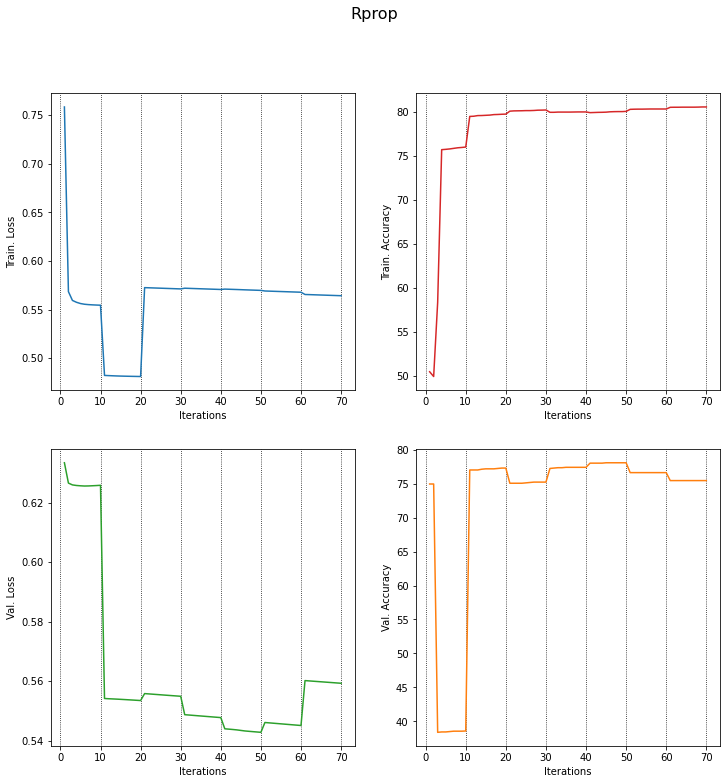

In [39]:
# Rprop -- No mini-batches!

nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.rprop, 
                opt_attr = {"inc":1.2, "dec":0.5, "step_sizes":(0.0001,50)},
                batch_size = len(X_train)//7,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Rprop")

#### 3.2 Rmsprop:


Fold: 1
Epoch: 00 - Loss: 0.6219 - Acc: 70.2102 - Val_Loss: 0.5631 - Val_Acc: 73.5938
Epoch: 02 - Loss: 0.4952 - Acc: 76.2649 - Val_Loss: 0.5336 - Val_Acc: 76.2500
Epoch: 04 - Loss: 0.4728 - Acc: 77.3903 - Val_Loss: 0.4881 - Val_Acc: 72.9688
Epoch: 06 - Loss: 0.4463 - Acc: 78.8969 - Val_Loss: 0.4703 - Val_Acc: 74.1667
Epoch: 08 - Loss: 0.4457 - Acc: 78.6551 - Val_Loss: 0.4815 - Val_Acc: 72.3958

Fold: 2
Epoch: 00 - Loss: 0.4679 - Acc: 78.3824 - Val_Loss: 0.4318 - Val_Acc: 80.2455
Epoch: 02 - Loss: 0.4654 - Acc: 79.1268 - Val_Loss: 0.4293 - Val_Acc: 80.7478
Epoch: 04 - Loss: 0.4429 - Acc: 79.2188 - Val_Loss: 0.4217 - Val_Acc: 80.3013
Epoch: 06 - Loss: 0.4303 - Acc: 79.6783 - Val_Loss: 0.4115 - Val_Acc: 81.5290
Epoch: 08 - Loss: 0.4553 - Acc: 78.8603 - Val_Loss: 0.4256 - Val_Acc: 80.1339

Fold: 3
Epoch: 00 - Loss: 0.4500 - Acc: 79.0165 - Val_Loss: 0.4218 - Val_Acc: 81.2500
Epoch: 02 - Loss: 0.4289 - Acc: 79.9908 - Val_Loss: 0.4066 - Val_Acc: 81.2500
Epoch: 04 - Loss: 0.4269 - Acc: 80.32

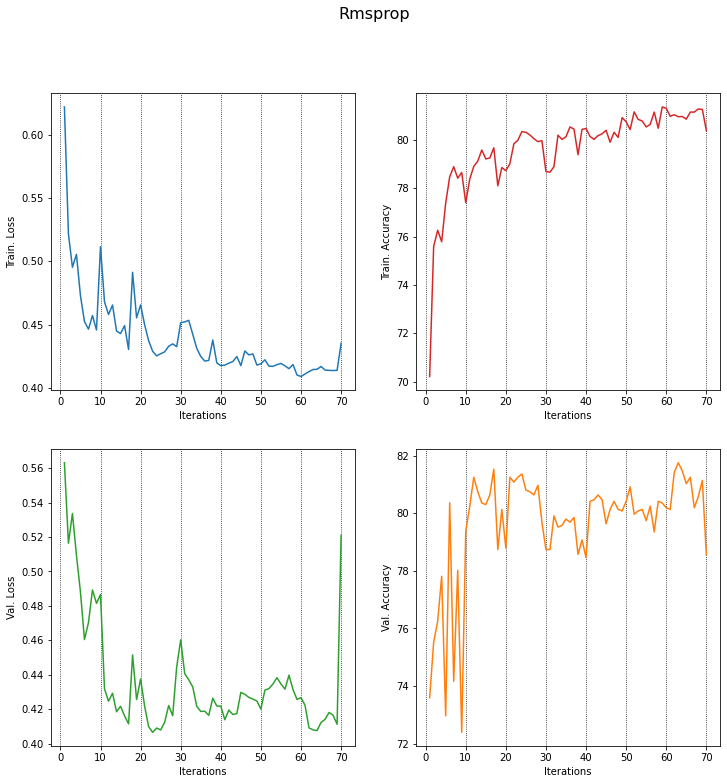

In [40]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.rmsprop, 
                opt_attr = {"lr":0.01, "decay":0.9, "eps":0.0001},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Rmsprop")

#### 3.2 Adam:


Fold: 1
Epoch: 00 - Loss: 0.6087 - Acc: 70.8426 - Val_Loss: 0.5317 - Val_Acc: 71.6146
Epoch: 02 - Loss: 0.4587 - Acc: 78.3389 - Val_Loss: 0.4613 - Val_Acc: 74.4271
Epoch: 04 - Loss: 0.4285 - Acc: 80.0781 - Val_Loss: 0.4401 - Val_Acc: 75.7292
Epoch: 06 - Loss: 0.4141 - Acc: 80.6362 - Val_Loss: 0.4258 - Val_Acc: 76.4583
Epoch: 08 - Loss: 0.4075 - Acc: 80.8873 - Val_Loss: 0.4173 - Val_Acc: 76.4062

Fold: 2
Epoch: 00 - Loss: 0.3972 - Acc: 81.6176 - Val_Loss: 0.4197 - Val_Acc: 79.9107
Epoch: 02 - Loss: 0.3954 - Acc: 81.6636 - Val_Loss: 0.4178 - Val_Acc: 80.0781
Epoch: 04 - Loss: 0.3940 - Acc: 81.6176 - Val_Loss: 0.4166 - Val_Acc: 80.1897
Epoch: 06 - Loss: 0.3930 - Acc: 81.6085 - Val_Loss: 0.4157 - Val_Acc: 80.3013
Epoch: 08 - Loss: 0.3923 - Acc: 81.7096 - Val_Loss: 0.4150 - Val_Acc: 80.1897

Fold: 3
Epoch: 00 - Loss: 0.3938 - Acc: 81.5625 - Val_Loss: 0.3877 - Val_Acc: 81.6964
Epoch: 02 - Loss: 0.3928 - Acc: 81.6912 - Val_Loss: 0.3877 - Val_Acc: 81.4174
Epoch: 04 - Loss: 0.3923 - Acc: 81.72

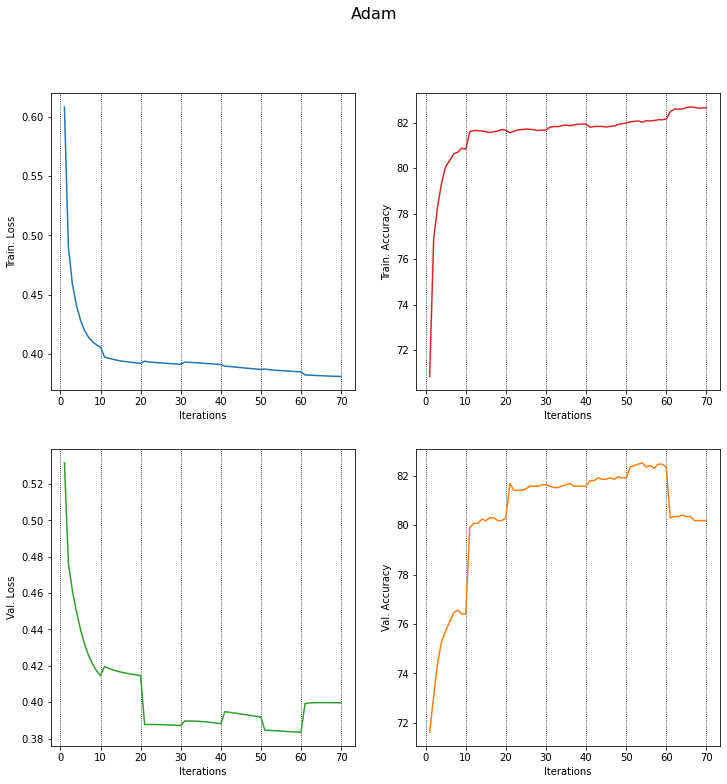

In [41]:
# Adam -- number of iterations

nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 
nn.t = 1

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.adam, 
                opt_attr = {"lr":0.01, "b":(0.9,0.999), "eps":0.0001},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Adam")

#### 3.2 Wame:


Fold: 1
Epoch: 00 - Loss: 0.6855 - Acc: 50.2976 - Val_Loss: 0.6677 - Val_Acc: 58.1543
Epoch: 02 - Loss: 0.6491 - Acc: 63.8021 - Val_Loss: 0.6567 - Val_Acc: 58.2031
Epoch: 04 - Loss: 0.5838 - Acc: 70.8054 - Val_Loss: 0.5616 - Val_Acc: 76.6602

Fold: 2
Epoch: 00 - Loss: 0.5402 - Acc: 74.6366 - Val_Loss: 0.5203 - Val_Acc: 75.4464
Epoch: 02 - Loss: 0.5034 - Acc: 78.9698 - Val_Loss: 0.4860 - Val_Acc: 77.7344
Epoch: 04 - Loss: 0.4557 - Acc: 79.9237 - Val_Loss: 0.4542 - Val_Acc: 78.1250

Fold: 3
Epoch: 00 - Loss: 0.4416 - Acc: 80.2053 - Val_Loss: 0.4259 - Val_Acc: 80.2455
Epoch: 02 - Loss: 0.4188 - Acc: 80.8957 - Val_Loss: 0.4101 - Val_Acc: 80.4688
Epoch: 04 - Loss: 0.4066 - Acc: 81.1592 - Val_Loss: 0.4020 - Val_Acc: 80.9710

Fold: 4
Epoch: 00 - Loss: 0.4058 - Acc: 81.0411 - Val_Loss: 0.3912 - Val_Acc: 81.9196
Epoch: 02 - Loss: 0.4016 - Acc: 81.1228 - Val_Loss: 0.3869 - Val_Acc: 81.9196
Epoch: 04 - Loss: 0.3996 - Acc: 81.2046 - Val_Loss: 0.3852 - Val_Acc: 81.9754

Fold: 5
Epoch: 00 - Loss: 0

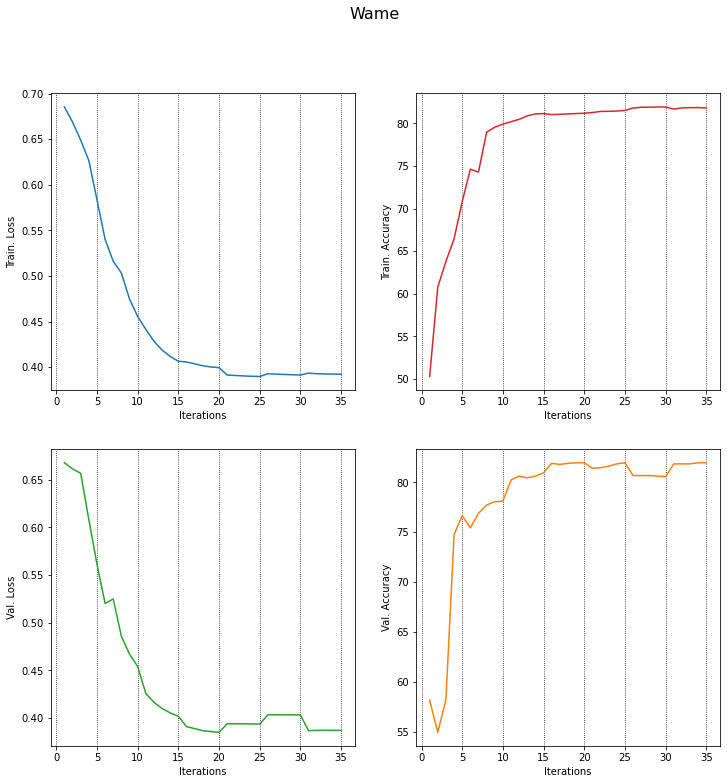

In [43]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.wame, 
                opt_attr = {"lr":0.001, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100), "eps":0.0001},
                batch_size = 256,
                epochs = 5,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Wame")